In [1]:
# draw arc in 3d space
# https://www.codementor.io/hirengadhiya/python-matplotlib-plotting-an-arc-in-3d-plot-wor3d4gzg
# Callin Switzer
# 16 July 2019

In [2]:
# imports
#%matplotlib qt 
# uncomment above on for interactive plots
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import interactive
interactive(True)

import sys
print("Python Version:", sys.version)

Python Version: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]


In [3]:
def cart2sphere(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z, r)
    phi = np.arctan2(y, x)
    return(r, theta, phi)

def sphere2cart(r, theta, phi):
    theta = theta - np.pi/2
    x = r * np.sin(theta)* np.cos(phi)
    y = r * np.sin(theta)* np.sin(phi)
    z = r * np.cos(theta)
    return(x, y, z)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

In [12]:
# define values 
theta = np.pi/2 # arclength in radians
radius = 50 # raduis of circle
k = 1/radius # if you want to use k instead of radius
phi = np.pi/4# angle of circle in xy plane



In [13]:
# discretize for plotting
arcIndex = np.linspace(0, theta, num = 100)
X, Y, Z, = sphere2cart(radius, arcIndex, phi)

In [14]:
# move center or arc to xy plane
x1, y1 = pol2cart(radius, phi)
X += x1
Y += y1

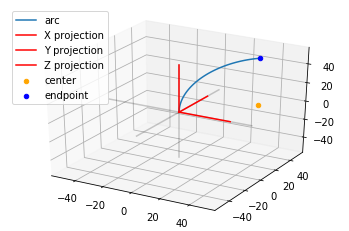

In [15]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# plot arc
ax.plot(X, Y, Z, label='arc')

# plot axes
ax.plot(np.zeros(100), np.zeros(100), np.linspace(-np.max(np.abs(Z)), np.max(np.abs(Z)), 100), c= "black", alpha = 0.2)
ax.plot(np.zeros(100), np.linspace(-np.max(np.abs(Z)), np.max(np.abs(Z)), 100), np.zeros(100),  c= "black", alpha = 0.2)
ax.plot(np.linspace(-np.max(np.abs(Z)), np.max(np.abs(Z)), 100), np.zeros(100), np.zeros(100),  c= "black", alpha = 0.2)

# plot center of circle
ax.scatter(np.array([x1]), np.array([y1]), np.array([0]), c = 'orange', label = "center")

# plot endpoint
ax.scatter(X[-1], Y[-1], Z[-1], c = 'blue', label = "endpoint")

# plot projection on each axis
ax.plot(X, np.zeros(len(X)), np.zeros(len(X)), color = "red", label = "X projection")
ax.plot(np.zeros(len(X)), Y, np.zeros(len(X)), color = "red", label = "Y projection")
ax.plot(np.zeros(len(X)), np.zeros(len(X)), Z, color = "red", label = "Z projection")

ax.legend()
plt.show()